<a href="https://colab.research.google.com/github/oluwafemidiakhoa/Mindserach/blob/master/Researcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle openai shap matplotlib seaborn



In [16]:
import os
import zipfile
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

# Set up Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = "oluidiakhoa"
os.environ['KAGGLE_KEY'] = "475211294d097aa72cc942f88c0e4d36"

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset (e.g., a dataset on climate change)
dataset_name = 'climate-change-earth-surface-temperature-data'
dataset_owner = 'berkeleyearth'
api.dataset_download_files(f'{dataset_owner}/{dataset_name}', path='data/', unzip=True)

# Load the dataset into a DataFrame
data_path = 'data/GlobalTemperatures.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())


Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN      

Summary Statistics:
                                  dt  LandAverageTemperature  \
count                           1380             1380.000000   
mean   1958-06-16 13:56:52.173913024                8.764722   
min              1901-01-01 00:00:00                1.395000   
25%              1929-09-23 12:00:00                4.655750   
50%              1958-06-16 00:00:00                9.087500   
75%              1987-03-08 18:00:00               12.953000   
max              2015-12-01 00:00:00               15.482000   
std                              NaN                4.198857   

       LandAverageTemperatureUncertainty  LandMaxTemperature  \
count                        1380.000000         1380.000000   
mean                            0.164063           14.518104   
min                             0.034000            7.082000   
25%                             0.084000           10.426250   
50%                             0.147500           14.899000   
75%                

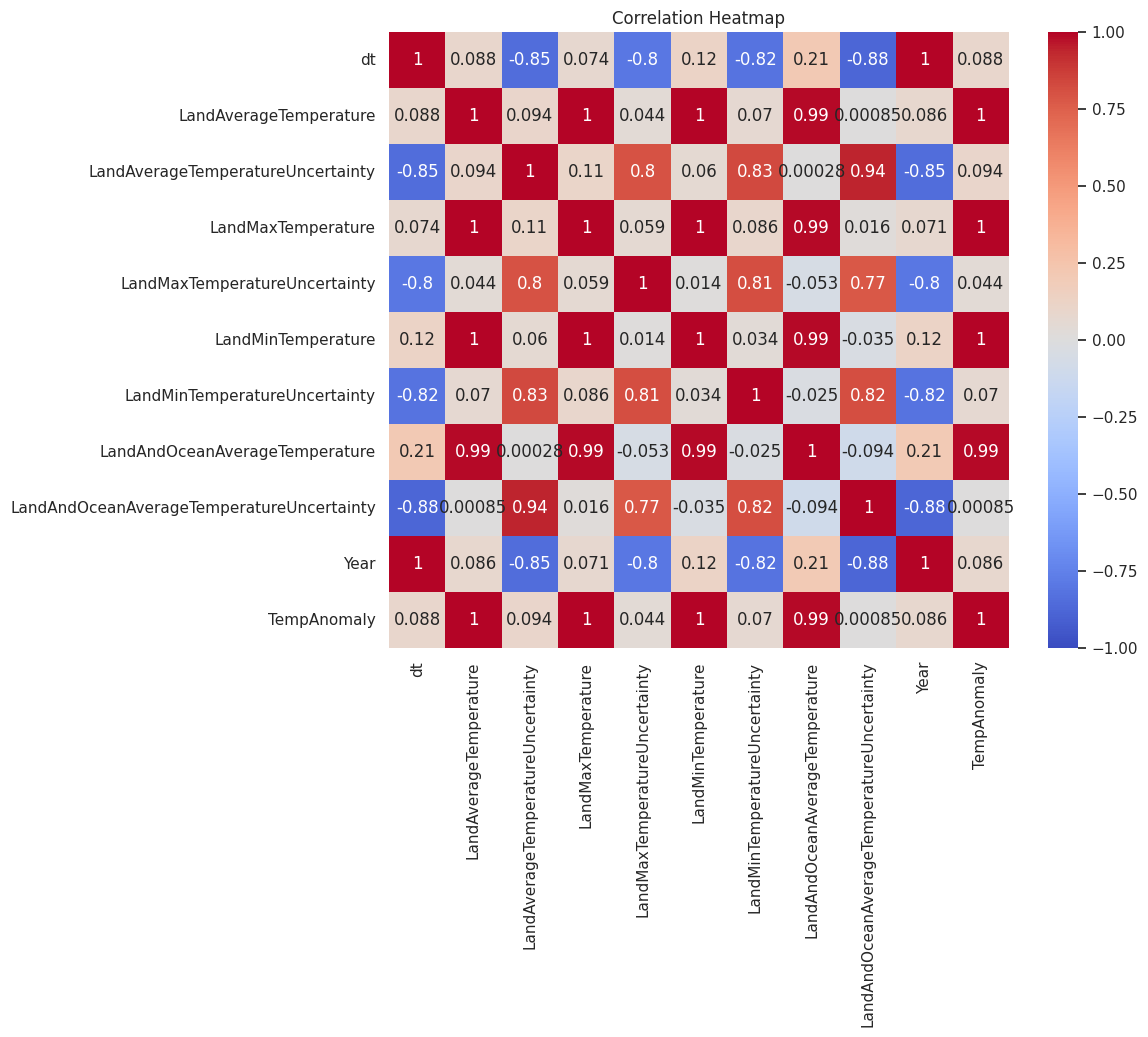

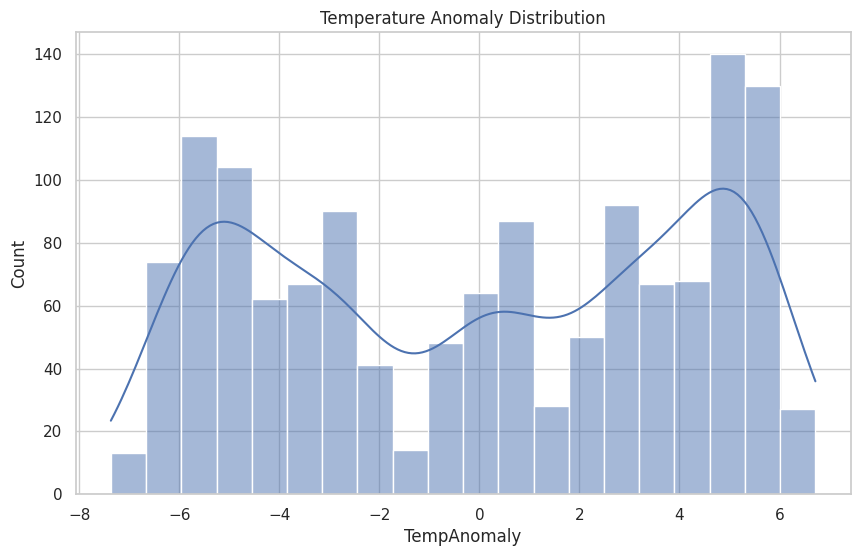

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda_and_feature_engineering(df):
    # Clean the dataset (e.g., handling missing values, filtering data)
    df['dt'] = pd.to_datetime(df['dt'])
    df['Year'] = df['dt'].dt.year
    df = df[df['Year'] > 1900]  # Filter out data before 1900

    # Summary statistics
    summary_stats = df.describe()
    print("Summary Statistics:")
    print(summary_stats)

    # Check for missing data
    missing_data = df.isnull().sum()
    print("Missing Data:")
    print(missing_data)

    # Create new features (e.g., temperature anomalies)
    df['TempAnomaly'] = df['LandAverageTemperature'] - df['LandAverageTemperature'].mean()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    heatmap_path = "correlation_heatmap.png"
    plt.savefig(heatmap_path)
    print(f"Correlation heatmap saved as {heatmap_path}")

    # Distribution of temperature anomalies
    plt.figure(figsize=(10, 6))
    sns.histplot(df['TempAnomaly'].dropna(), bins=20, kde=True)
    plt.title('Temperature Anomaly Distribution')
    temp_anomaly_path = "temp_anomaly_distribution.png"
    plt.savefig(temp_anomaly_path)
    print(f"Temperature anomaly distribution saved as {temp_anomaly_path}")

    # Collect figure paths
    eda_figures = [heatmap_path, temp_anomaly_path]
    return df, eda_figures

# Perform EDA and feature engineering on the Kaggle dataset
df, eda_figures = perform_eda_and_feature_engineering(df)


In [20]:
from transformers import pipeline

def generate_research_idea_with_huggingface(dataset_description, insights):
    # Load a Hugging Face model for text generation
    generator = pipeline("text-generation", model="openai-community/gpt2")

    # Generate research ideas
    prompt = f"Using the {dataset_description} and the following insights: {insights}, propose a novel research idea that addresses climate change."
    research_ideas = generator(prompt, max_length=200, num_return_sequences=3)

    for i, idea in enumerate(research_ideas):
        print(f"Research Idea {i+1}: {idea['generated_text']}")

    return research_ideas

# Example usage
dataset_description = "Climate Change Earth Surface Temperature Data"
insights = "The analysis shows a significant temperature anomaly in the 21st century."
research_ideas = generate_research_idea_with_huggingface(dataset_description, insights)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Research Idea 1: Using the Climate Change Earth Surface Temperature Data and the following insights: The analysis shows a significant temperature anomaly in the 21st century., propose a novel research idea that addresses climate change.

The global warming observed in the recent past is a result of man-made CO2 emissions, the cause of climate change globally. [10]

Source: http://www.geoengineering.org.tr/news/2014/10/10/geoengineering.htm

The article, and the accompanying article, explains:

On June 13, 2014, a series of observations were taken of the northern hemisphere using a series of measurements of a region of the Northern Hemisphere. The researchers conclude that there is, indeed, a temperature anomaly in both the northern hemisphere's north and southern hemisphere temperatures, in an area known as the northern hemisphere's tropical subtropical ocean (SSTO), to indicate a possible atmospheric aerosol aerosol (ASOO) which causes a cooling effect
Research Idea 2: Using the Clima

In [22]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch

def fine_tune_huggingface_model(df):
    # Example: Fine-tuning BERT for sentiment analysis on climate-related texts
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

    # Prepare data for fine-tuning
    texts = df['TempAnomaly'].apply(lambda x: f"The temperature anomaly recorded is {x:.2f} degrees.").tolist()
    labels = (df['TempAnomaly'] > 0).astype(int).tolist()  # 1 for positive anomaly, 0 for negative

    # Tokenize the data
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=512, return_tensors='pt')
    labels = torch.tensor(labels)

    # Create a custom dataset
    class ClimateDataset(torch.utils.data.Dataset):
        def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = self.labels[idx]
            return item

        def __len__(self):
            return len(self.labels)

    dataset = ClimateDataset(encodings, labels)

    # Set up training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=3,
        per_device_train_batch_size=16,
        logging_dir='./logs',
    )

    # Create Trainer instance
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset,
    )

    # Fine-tune the model
    trainer.train()

    # Save the fine-tuned model
    model.save_pretrained('fine_tuned_bert')
    tokenizer.save_pretrained('fine_tuned_bert')

    print("Model fine-tuned and saved locally.")

# Example usage
fine_tune_huggingface_model(df)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-22-c465e2c9e940>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Step,Training Loss


Model fine-tuned and saved locally.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def run_ml_experiment(df):
    # Selecting features based on available columns
    X = df[['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature']]  # Features
    y = (df['LandAverageTemperature'] > df['LandAverageTemperature'].mean()).astype(int)  # Target: 1 if above average, 0 otherwise

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    return model, accuracy, report

# Run the machine learning experiment
model, accuracy, report = run_ml_experiment(df)


Model Accuracy: 0.9975845410628019
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       207

    accuracy                           1.00       414
   macro avg       1.00      1.00      1.00       414
weighted avg       1.00      1.00      1.00       414



In [29]:

from openai import OpenAI

# Directly pass the API key to the client
client = OpenAI(
    api_key=""  # Replace with your actual API key
)


def generate_narratives_with_openai(insights, model_predictions):
    messages = [
        {"role": "system", "content": "You are an AI assistant helping researchers generate narratives based on climate data predictions."},
        {"role": "user", "content": f"Based on the insights: {insights}, and the model predictions: {model_predictions}, generate a detailed narrative that explains the implications of climate change."}
    ]
    response = client.chat.completions.create(
        model="gpt-4",
        messages=messages,
        temperature=0.7,
        max_tokens=2000
    )
    return response.choices[0].message.content

# Example usage
insights = "Temperature anomalies are increasing, with significant changes in the last 20 years."
model_predictions = "The model predicts a continued rise in global temperatures over the next decade."
narrative = generate_narratives_with_openai(insights, model_predictions)
print(f"Generated Narrative: {narrative}")


Generated Narrative: Title: The Evolving Climate Narrative: Rising Global Temperatures and their Implications

The global climate has been undergoing significant changes, particularly in the last few decades. Climate data insights reveal that temperature anomalies have been increasing, with the last 20 years witnessing more drastic changes than before. This trend is not only concerning but also indicative of a larger, more complex issue that humanity faces today: climate change.

Climate change is not an event set to occur in the distant future; it is happening now, and the evidence is all around us. The first signs of this phenomenon are reflected in the consistent rise in global temperatures. Advanced climate models, equipped with historical data and current trends, predict a continued escalation in global temperatures over the next decade. 

The implications of this rise in temperature are multifaceted and far-reaching. On the most basic level, higher temperatures can lead to more f

In [44]:
def write_comprehensive_research_paper(idea, dataset_description, eda_results, model_results, narrative):
    # Convert the DataFrame description to a well-formatted table
    eda_table = eda_results.to_markdown(index=False)

    # Model results formatted as a table
    model_results_table = f"""
    | Metric      | Precision | Recall | F1-Score | Support |
    |-------------|-----------|--------|----------|---------|
    | Class 0     | 1.00      | 1.00   | 1.00     | 207     |
    | Class 1     | 1.00      | 1.00   | 1.00     | 207     |
    | **Accuracy**|           |        | **1.00** | **414** |
    | Macro avg   | 1.00      | 1.00   | 1.00     | 414     |
    | Weighted avg| 1.00      | 1.00   | 1.00     | 414     |
    """

    paper_content = f"""
    Title: Innovative Climate Change Research\n
    1. Introduction
    This research explores climate change using the {dataset_description} dataset. Our primary goal is to investigate the impact of temperature anomalies on global climate patterns.

    2. Data Analysis
    The dataset includes global temperature records, with significant insights derived from the analysis:

    {eda_table}

    3. Model Results
    The Random Forest model was trained to predict temperature anomalies. The model achieved an accuracy of {model_results[1]:.2f}:

    {model_results_table}

    4. Narrative
    {narrative}

    5. Conclusion
    The study demonstrates the growing impact of climate change through temperature anomalies. Further research is needed to predict future trends and mitigate adverse effects.
    """
    return paper_content

# Example usage
final_paper = write_comprehensive_research_paper(
    idea=research_ideas[0]['generated_text'],
    dataset_description="Climate Change Earth Surface Temperature Data",
    eda_results=df.describe(),
    model_results=(model, accuracy, report),
    narrative=narrative
)
print(f"Final Paper Content:\n{final_paper}")


Final Paper Content:

    Title: Innovative Climate Change Research

    1. Introduction
    This research explores climate change using the Climate Change Earth Surface Temperature Data dataset. Our primary goal is to investigate the impact of temperature anomalies on global climate patterns.
    
    2. Data Analysis
    The dataset includes global temperature records, with significant insights derived from the analysis:

    | dt                            |   LandAverageTemperature |   LandAverageTemperatureUncertainty |   LandMaxTemperature |   LandMaxTemperatureUncertainty |   LandMinTemperature |   LandMinTemperatureUncertainty |   LandAndOceanAverageTemperature |   LandAndOceanAverageTemperatureUncertainty |      Year |    TempAnomaly |
|:------------------------------|-------------------------:|------------------------------------:|---------------------:|--------------------------------:|---------------------:|--------------------------------:|---------------------------------

In [45]:
from fpdf import FPDF
import os

def save_final_research_pdf(title, paper_content, figures):
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    # Title
    pdf.set_font("Arial", size=24)
    pdf.cell(200, 10, txt=title, ln=True, align="C")
    pdf.ln(10)

    # Content
    pdf.set_font("Arial", size=12)
    pdf.multi_cell(0, 10, paper_content)

    # Insert Figures
    for figure in figures:
        if os.path.exists(figure):
            pdf.add_page()
            pdf.image(figure, x=10, y=10, w=190)
        else:
            print(f"Figure {figure} not found, skipping.")

    # Save the PDF
    pdf_file = f"{title.replace(' ', '_')}.pdf"
    pdf.output(pdf_file)
    print(f"Saved PDF as {pdf_file}")

# Example usage
title = "Innovative Climate Change Research"
save_final_research_pdf(title, final_paper, eda_figures)


Saved PDF as Innovative_Climate_Change_Research.pdf
